In [2]:
import matplotlib.pyplot as plt
from src.data_functions import *

%matplotlib inline

In [24]:
ECG_sig, _ = get_patients_ECG([2])
SpO2_sig, _ = get_patients_SpO2([2])

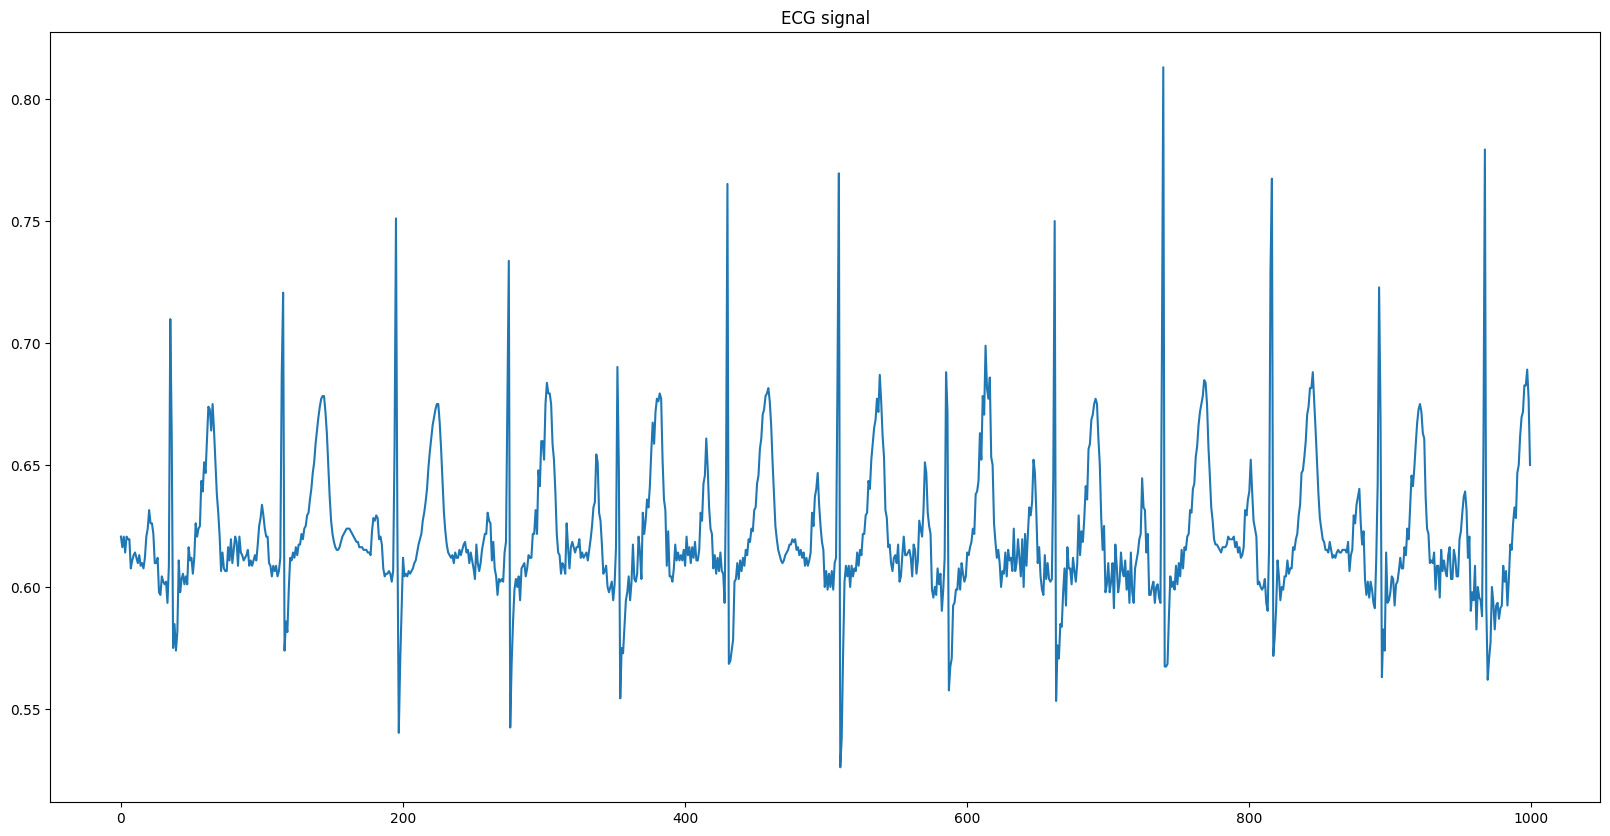

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(ECG_sig[1][:1000:])
plt.title("ECG signal")
plt.show()

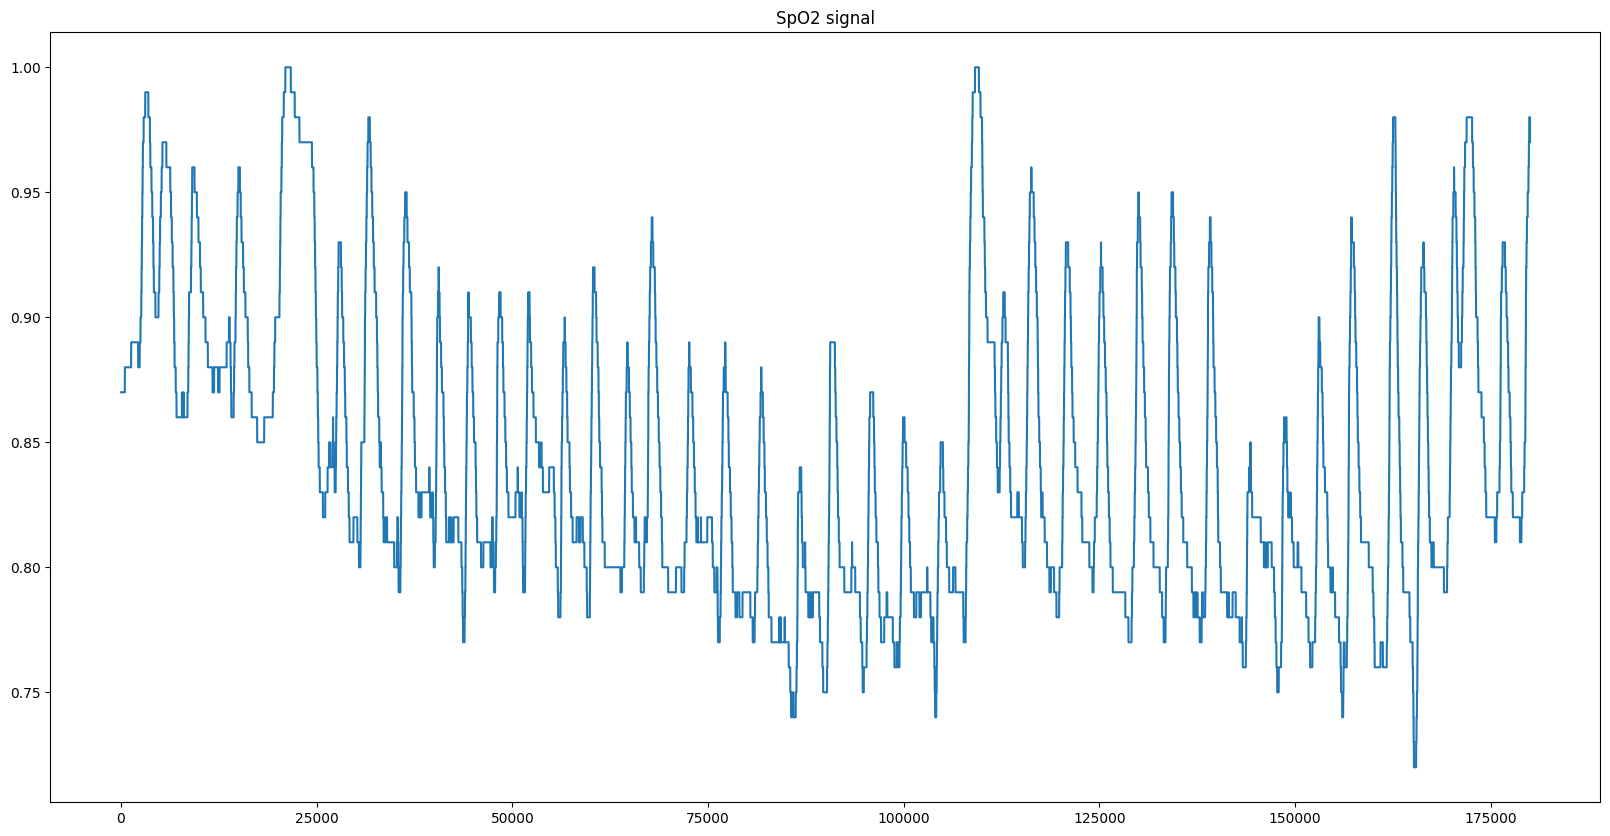

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(SpO2_sig.flatten()[:180000:])
plt.title("SpO2 signal")
plt.show()